# Data Preparation

In [1]:
pip install yfinance # install yahoo finance library

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import the libraries
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf

In [3]:
# Function to retrieve the daily adjusted closing prices for the specified tokens within the past given years.

def stock_data(tokens, years):
    data = pd.DataFrame()
    stocks = list()
    # Calculate the end date (today's date)
    end_date = datetime.today()
    for i in tokens:
        # Calculate the start date by subtracting years from the end date
        start_date = end_date - timedelta(days=years * 365)
        # Download historical data for the specified ticker and within the date range
        historical_data = yf.download(i, start=start_date, end=end_date)
        # Concatenate the adjusted closing prices to the dataframe
        data = pd.concat([data, pd.DataFrame(historical_data['Adj Close'])], axis=1)
        stocks.append(i)
    # Rename columns with ticker names
    data.columns = stocks
    return data

tokens = ["BTC-USD","AVAX-USD"] 
years = 2

stock_df = stock_data(tokens,years) 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


stock_df is the dataframe contains the daily prices for BTC and AVAX for last 2 years.

In [4]:
#Display the last few rows of data
column_names=['BTC','AVAX'] # rename the columns
stock_df.columns=column_names
stock_df.tail(3)

,BTC,AVAX
Date,,
2024-06-03,68804.781250,35.040466
2024-06-04,70567.765625,36.073288
2024-06-06,71081.570312,36.342316


# # Data cleaning

In [5]:
#check the data types of each variables
stock_df.dtypes

BTC     float64
AVAX    float64
dtype: object

In [6]:
#check for the missing values.
stock_df[['BTC','AVAX']].isnull().values.any()

False

No missing values found here.

In [7]:
#check for any impossible values
stock_df['BTC'][stock_df.BTC<=0]

Series([], Name: BTC, dtype: float64)

In [8]:
stock_df['AVAX'][stock_df.AVAX<=0]

Series([], Name: AVAX, dtype: float64)

<Figure size 576x432 with 0 Axes>

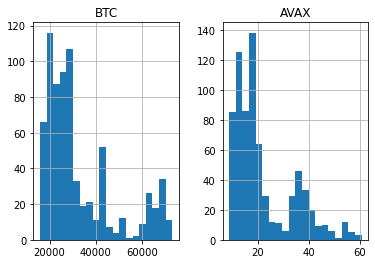

In [9]:
#check for the outliers
plt.figure(figsize=(8,6))
stock_df.hist(bins=20)
plt.show()

# # Statistical Analysis

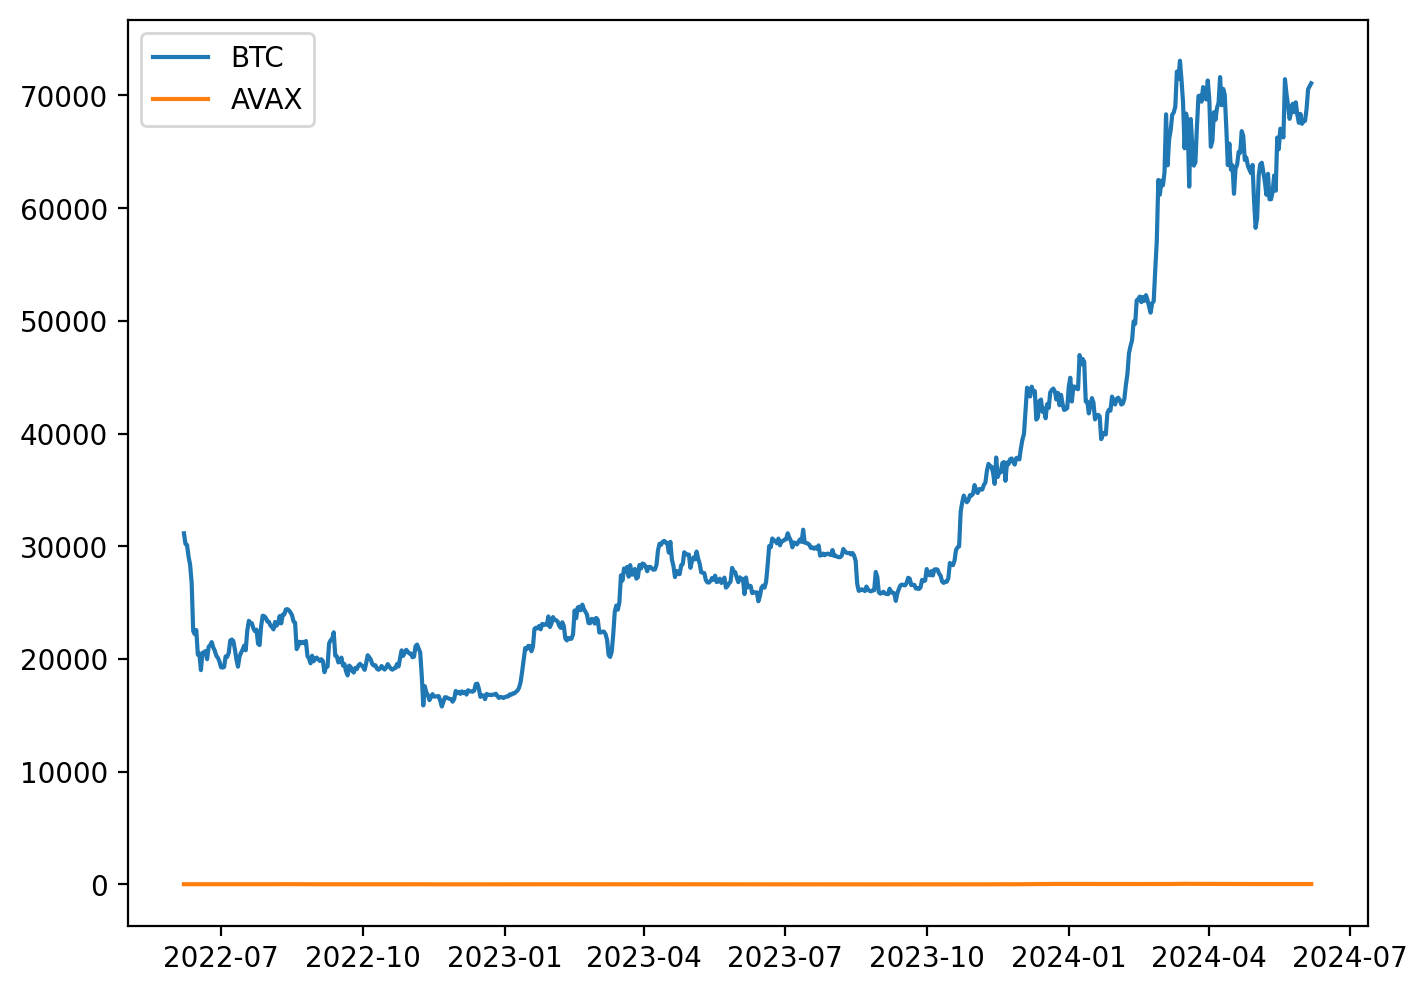

In [10]:
# Visualize the price trend in line chart.

plt.figure(figsize=(8, 6), dpi=200)  # Define the figure size and dpi
BTC = stock_df['BTC'] 
AVAX = stock_df['AVAX'] 
plt.plot(BTC, label="BTC")
plt.plot(AVAX, label="AVAX")
plt.legend()
plt.show()  # Show the plot

In this case, as the price ranges differ, the trends will be displayed using dual-axis line chart.

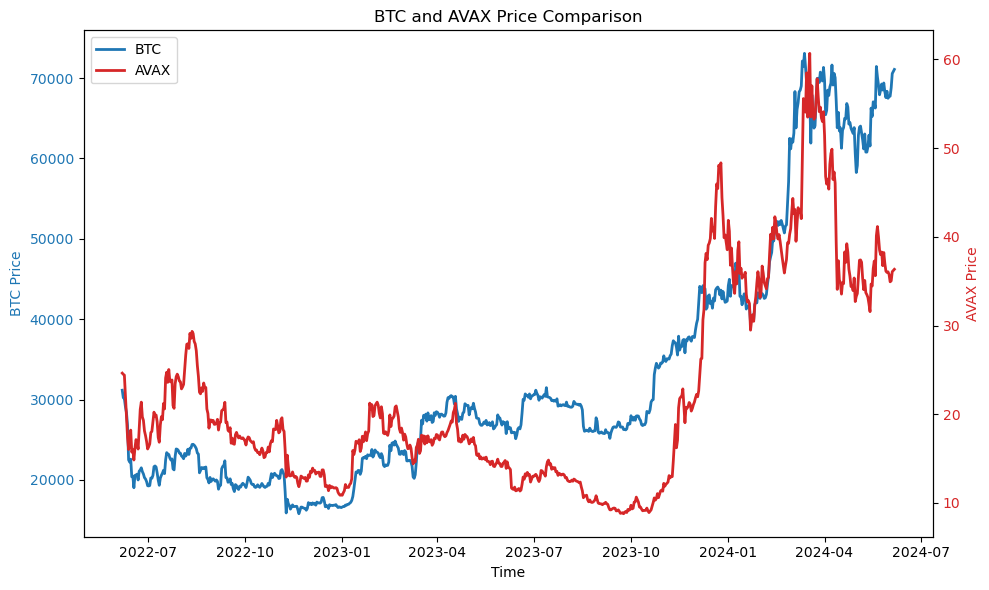

In [11]:
# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)

# Plot the first time series for BTC on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('BTC Price', color=color)
ax1.plot(BTC, color=color, linestyle='-', linewidth=2, label='BTC')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the AVAX second time series
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AVAX Price', color=color)
ax2.plot(AVAX, color=color, linewidth=2, label='AVAX')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and legend
plt.title('BTC and AVAX Price Comparison')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

The strong correlation between the two lines suggests a potential relationship between the price movements of BTC and AVAX.

In [12]:
#Calculate the pairwise correlation coefficients.
cc = stock_df.corr()
cc

,BTC,AVAX
BTC,1.000000,0.835712
AVAX,0.835712,1.000000


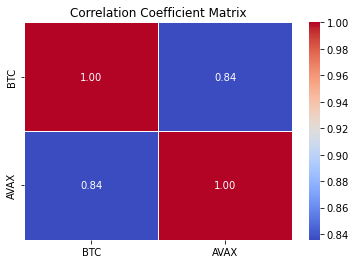

In [13]:
# Visualize the correlation in the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cc, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficient Matrix')
plt.show()

When visualized in a heatmap, the correlation coefficients matrix shows that BTC and AVAX have a correlation coefficient of 0.84, indicating a high degree of positive correlation between their price movements.

# # Augmented Dickey-Fuller (ADF) Test

Before performing mean reversion we need to check for the stationarity. Here ADF test is used for this purpose.

In [14]:
from statsmodels.tsa.stattools import adfuller

# Calculate the price spread
stock_df['Spread'] = stock_df['BTC'] - stock_df['AVAX']

# Calculate the ratio spread
stock_df['Ratio1'] = stock_df['BTC'] / stock_df['AVAX']
stock_df['Ratio2'] = stock_df['AVAX'] / stock_df['BTC']

columns_to_test = ['BTC', 'AVAX', 'Spread', 'Ratio1','Ratio2']  # List of columns to test

# Iterate over each column and perform ADF test
for column in columns_to_test:
    data = stock_df[column]
    result = adfuller(data)
    
    # Extracting results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Printing results
    print(f"Results for {column}:")
    print("-----------------------------------------------")    
    print("ADF Statistic:", adf_statistic)
    print("p-value:", p_value)
    print("Critical Values:", critical_values)
    print("-----------------------------------------------")


Results for BTC:
-----------------------------------------------
ADF Statistic: 0.9246059418566416
p-value: 0.9934031835827296
Critical Values: {'1%': -3.439606888036868, '5%': -2.865625121924057, '10%': -2.5689454046801052}
-----------------------------------------------
Results for AVAX:
-----------------------------------------------
ADF Statistic: -1.7209368055759806
p-value: 0.42035876602387406
Critical Values: {'1%': -3.4395289262948894, '5%': -2.8655907692307694, '10%': -2.5689271030368235}
-----------------------------------------------
Results for Spread:
-----------------------------------------------
ADF Statistic: 0.9274138959594219
p-value: 0.9934378563433782
Critical Values: {'1%': -3.439606888036868, '5%': -2.865625121924057, '10%': -2.5689454046801052}
-----------------------------------------------
Results for Ratio1:
-----------------------------------------------
ADF Statistic: -1.4123145033268054
p-value: 0.5763583596785758
Critical Values: {'1%': -3.439401867895854

Based on the p-values:

For Bitcoin, the p-value is approximately 0.993, which is much greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that the BTC series is likely non-stationary.

For Avalanche, the p-value is approximately 0.414, which is also greater than 0.05. Similarly, we fail to reject the null hypothesis, suggesting that the AVAX series is likely non-stationary as well.

In conclusion neither the BTC nor AVAX series appears to be stationary. Therefore further ananlysis required.

## Phillips–Perron (PP) test 

In [15]:
pip install arch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from arch.unitroot import PhillipsPerron  

columns_to_test = ['BTC', 'AVAX']  # List of columns to test

# Iterate over each column and perform PP test
for column in columns_to_test:
    data = stock_df[column]
    pp_test = PhillipsPerron(data)  # Using PhillipsPerron class
    
    # Extracting results
    pp_statistic = pp_test.stat  # PP statistic
    p_value = pp_test.pvalue  # p-value
    critical_values = pp_test.critical_values  # Critical values
    
    # Printing results
    print(f"Results for {column}:")
    print("-----------------------------------------------")
    print("PP Statistic:", pp_statistic)
    print("p-value:", p_value)
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"\t{key}: {value}")
    print("-----------------------------------------------")

Results for BTC:
-----------------------------------------------
PP Statistic: 0.8941573117344432
p-value: 0.9930136019897371
Critical Values:
	1%: -3.4393520240470554
	5%: -2.8655128165959236
	10%: -2.5688855736949163
-----------------------------------------------
Results for AVAX:
-----------------------------------------------
PP Statistic: -1.439559746760545
p-value: 0.5631707130918377
Critical Values:
	1%: -3.4393520240470554
	5%: -2.8655128165959236
	10%: -2.5688855736949163
-----------------------------------------------


In conclusion neither the BTC nor AVAX series appears to be stationary.

In [17]:
# Differencing
stock_df['BTC_diff'] = stock_df['BTC'].diff()
stock_df['AVAX_diff'] = stock_df['AVAX'].diff()

# Log Transformation
stock_df['BTC_log'] = np.log(stock_df['BTC'])
stock_df['AVAX_log'] = np.log(stock_df['AVAX'])

In [18]:
# Columns to test
columns_to_test = ['BTC_diff', 'AVAX_diff', 'BTC_log', 'AVAX_log']

# Iterate over each column and perform ADF test
for column in columns_to_test:
    data = stock_df[column].dropna()  # Remove NaN values
    result = adfuller(data)
    
    # Extracting results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Printing results
    print(f"Results for {column}:")
    print("-----------------------------------------------")    
    print("ADF Statistic:", adf_statistic)
    print("p-value:", p_value)
    print("Critical Values:", critical_values)
    print("-----------------------------------------------")


Results for BTC_diff:
-----------------------------------------------
ADF Statistic: -5.98425053355069
p-value: 1.8079527391416815e-07
Critical Values: {'1%': -3.439606888036868, '5%': -2.865625121924057, '10%': -2.5689454046801052}
-----------------------------------------------
Results for AVAX_diff:
-----------------------------------------------
ADF Statistic: -5.7663098560953445
p-value: 5.522340817701902e-07
Critical Values: {'1%': -3.439606888036868, '5%': -2.865625121924057, '10%': -2.5689454046801052}
-----------------------------------------------
Results for BTC_log:
-----------------------------------------------
ADF Statistic: 0.32361799075423914
p-value: 0.9784024928791119
Critical Values: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
-----------------------------------------------
Results for AVAX_log:
-----------------------------------------------
ADF Statistic: -1.0516320709234876
p-value: 0.7339703010648293
Critical Values: {'1%':

Based on these results, it seems that differencing the data has made it stationary, while the log transformation did not achieve the same result. Therefore, differenced series might be more suitable for further analysis involving mean reversion.

# # Mean reversion

We calculate the mean and standard deviation as they are essential parameters for implementing a mean reversion trading strategy.

In [19]:
mean_BTC = stock_df['BTC'].mean()
std_BTC = stock_df['BTC'].std()

mean_AVAX = stock_df['AVAX'].mean()
std_AVAX = stock_df['AVAX'].std()

print("mean BTC:",mean_BTC)
print("std BTC:",std_BTC)
print("mean AVAX:",mean_AVAX)
print("std AVAX:",std_AVAX)

mean BTC: 32771.60908872003
std BTC: 15584.771197624894
mean AVAX: 21.9046037595566
std AVAX: 11.60172997540405


In [20]:
# Calculate the price spread
stock_df['Spread'] = stock_df['BTC'] - stock_df['AVAX']

# Calculate rolling mean and standard deviation
rolling_mean = stock_df['Spread'].rolling(window=30).mean()  # 30-day rolling mean
rolling_sd = stock_df['Spread'].rolling(window=30).std()  # 30-day rolling standard deviation

# show the last few rows of data
print(stock_df.tail(3))
print("----------------------------")

# Print the last few rows of rolling mean and standard deviation
print("Last 3 rows of Rolling Mean:")
print(rolling_mean.tail(3))
print("----------------------------")
print("Last 3 rows of Rolling Standard Deviation:")
print(rolling_sd.tail(3))

                     BTC       AVAX        Spread       Ratio1    Ratio2  \
Date                                                                       
2024-06-03  68804.781250  35.040466  68769.740784  1963.580640  0.000509   
2024-06-04  70567.765625  36.073288  70531.692337  1956.233258  0.000511   
2024-06-06  71081.570312  36.342316  71045.227997  1955.889959  0.000511   

               BTC_diff  AVAX_diff    BTC_log  AVAX_log  
Date                                                     
2024-06-03  1053.179688   0.107975  11.139029  3.556504  
2024-06-04  1762.984375   1.032822  11.164329  3.585553  
2024-06-06   513.804688   0.269028  11.171583  3.592983  
----------------------------
Last 3 rows of Rolling Mean:
Date
2024-06-03    66075.886932
2024-06-04    66293.818981
2024-06-06    66557.832886
Name: Spread, dtype: float64
----------------------------
Last 3 rows of Rolling Standard Deviation:
Date
2024-06-03    3152.343364
2024-06-04    3228.508722
2024-06-06    3283.800171
N

In [21]:
# Calculate rolling mean and standard deviation for the differences
rolling_mean_diff = stock_df['BTC_diff'].rolling(window=30).mean()  # 30-day rolling mean for BTC difference
rolling_sd_diff = stock_df['BTC_diff'].rolling(window=30).std()  # 30-day rolling standard deviation for BTC difference

# Calculate the spread for the differences
stock_df['Spread_diff'] = stock_df['BTC_diff'] - stock_df['AVAX_diff']

# Calculate rolling mean and standard deviation for the spread of differences
rolling_mean_spread_diff = stock_df['Spread_diff'].rolling(window=30).mean()  # 30-day rolling mean for spread of differences
rolling_sd_spread_diff = stock_df['Spread_diff'].rolling(window=30).std()  # 30-day rolling standard deviation for spread of differences

# Show the last few rows of data
print(stock_df.tail(3))
print("----------------------------")

# Print the last few rows of rolling mean and standard deviation for the spread of differences
print("Last 3 rows of Rolling Mean for Spread of Differences:")
print(rolling_mean_spread_diff.tail(3))
print("----------------------------")
print("Last 3 rows of Rolling Standard Deviation for Spread of Differences:")
print(rolling_sd_spread_diff.tail(3))

                     BTC       AVAX        Spread       Ratio1    Ratio2  \
Date                                                                       
2024-06-03  68804.781250  35.040466  68769.740784  1963.580640  0.000509   
2024-06-04  70567.765625  36.073288  70531.692337  1956.233258  0.000511   
2024-06-06  71081.570312  36.342316  71045.227997  1955.889959  0.000511   

               BTC_diff  AVAX_diff    BTC_log  AVAX_log  Spread_diff  
Date                                                                  
2024-06-03  1053.179688   0.107975  11.139029  3.556504  1053.071712  
2024-06-04  1762.984375   1.032822  11.164329  3.585553  1761.951553  
2024-06-06   513.804688   0.269028  11.171583  3.592983   513.535660  
----------------------------
Last 3 rows of Rolling Mean for Spread of Differences:
Date
2024-06-03    163.854332
2024-06-04    217.932049
2024-06-06    264.013905
Name: Spread_diff, dtype: float64
----------------------------
Last 3 rows of Rolling Standard Devia

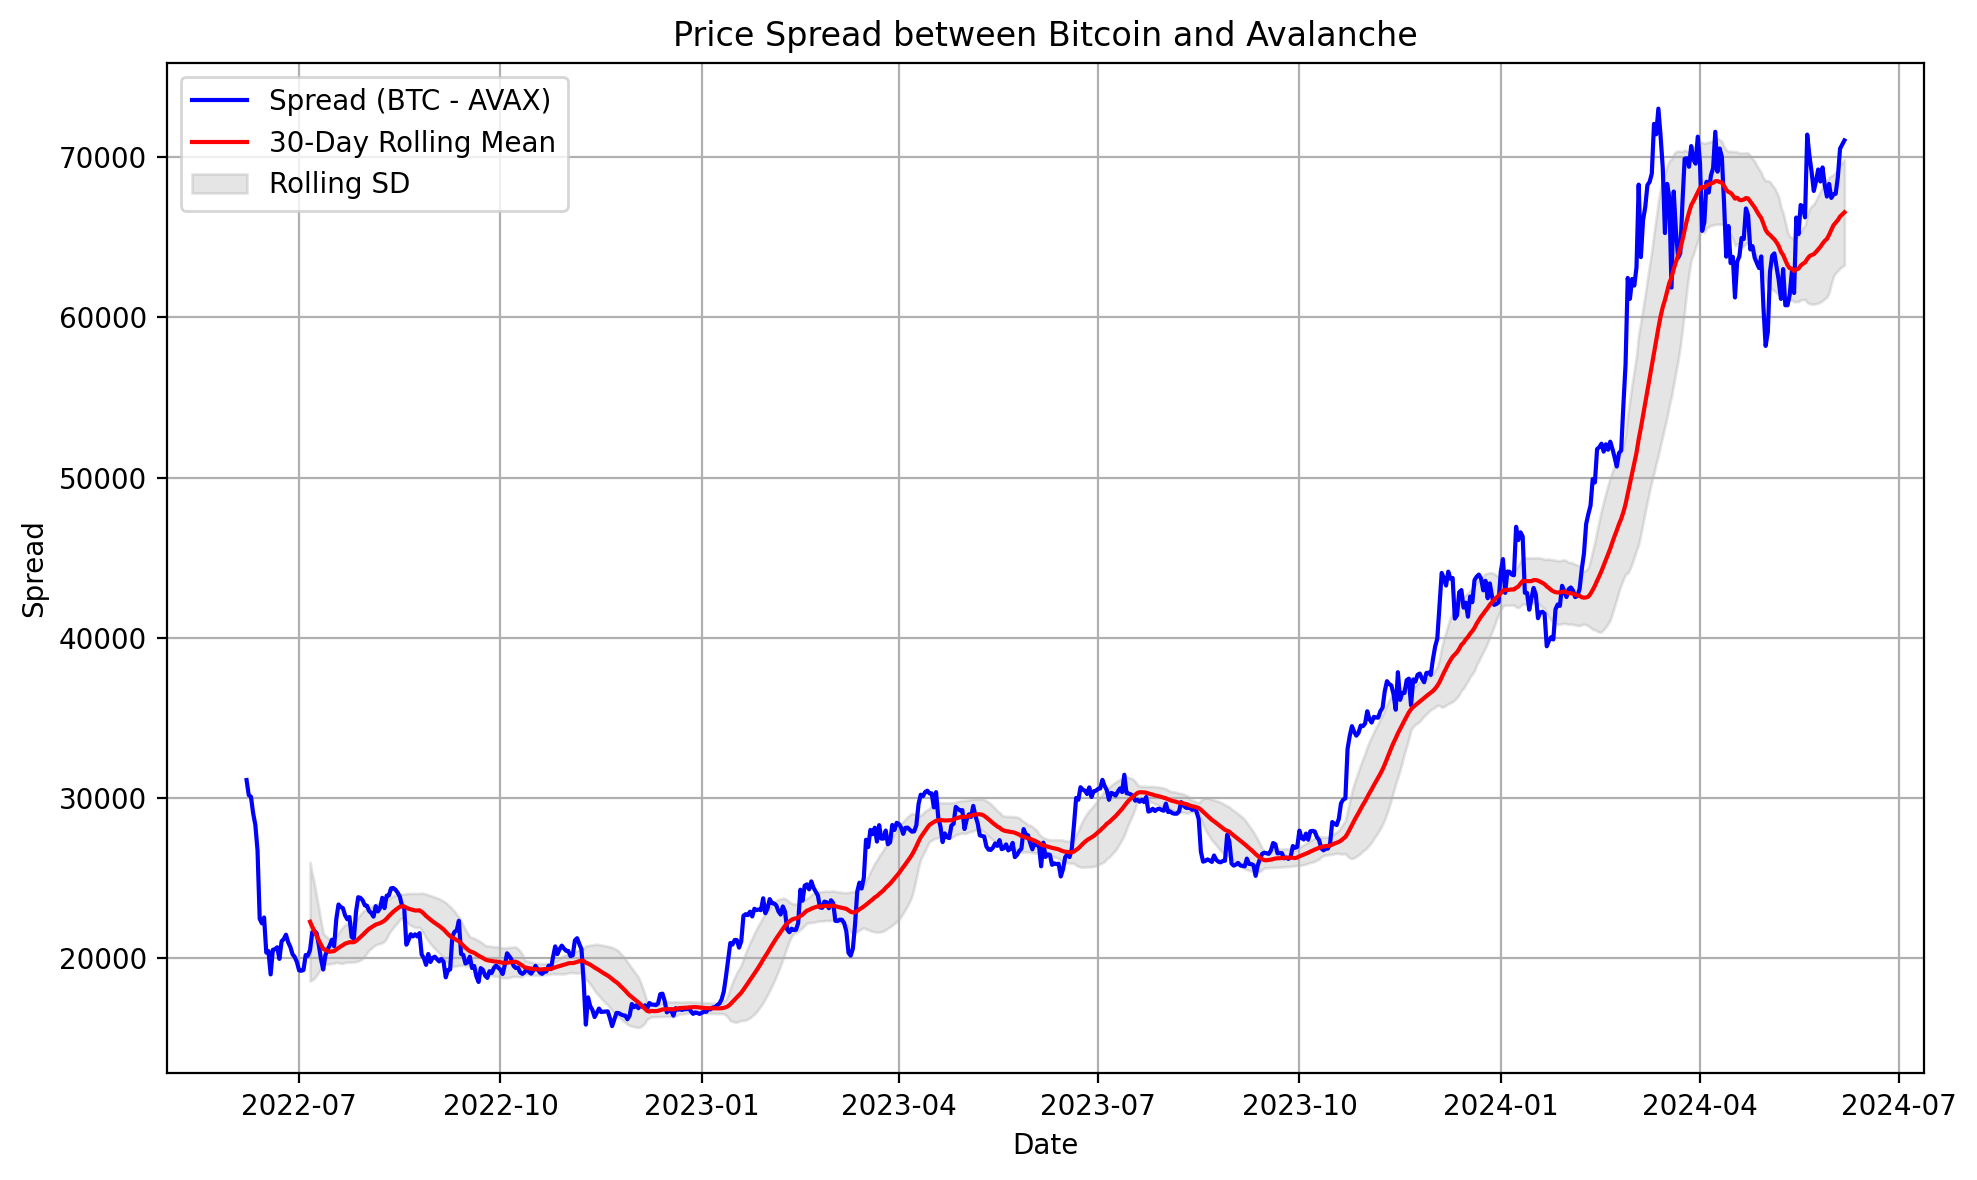

In [22]:
# Plotting the rolling mean and SD for the price spread between BTC and AVAX
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(stock_df.index, stock_df['Spread'], label='Spread (BTC - AVAX)', color='blue')
plt.plot(stock_df.index, rolling_mean, label='30-Day Rolling Mean', color='red')
plt.fill_between(stock_df.index, rolling_mean - rolling_sd, rolling_mean + rolling_sd, color='gray', alpha=0.2, label='Rolling SD')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Price Spread between Bitcoin and Avalanche')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

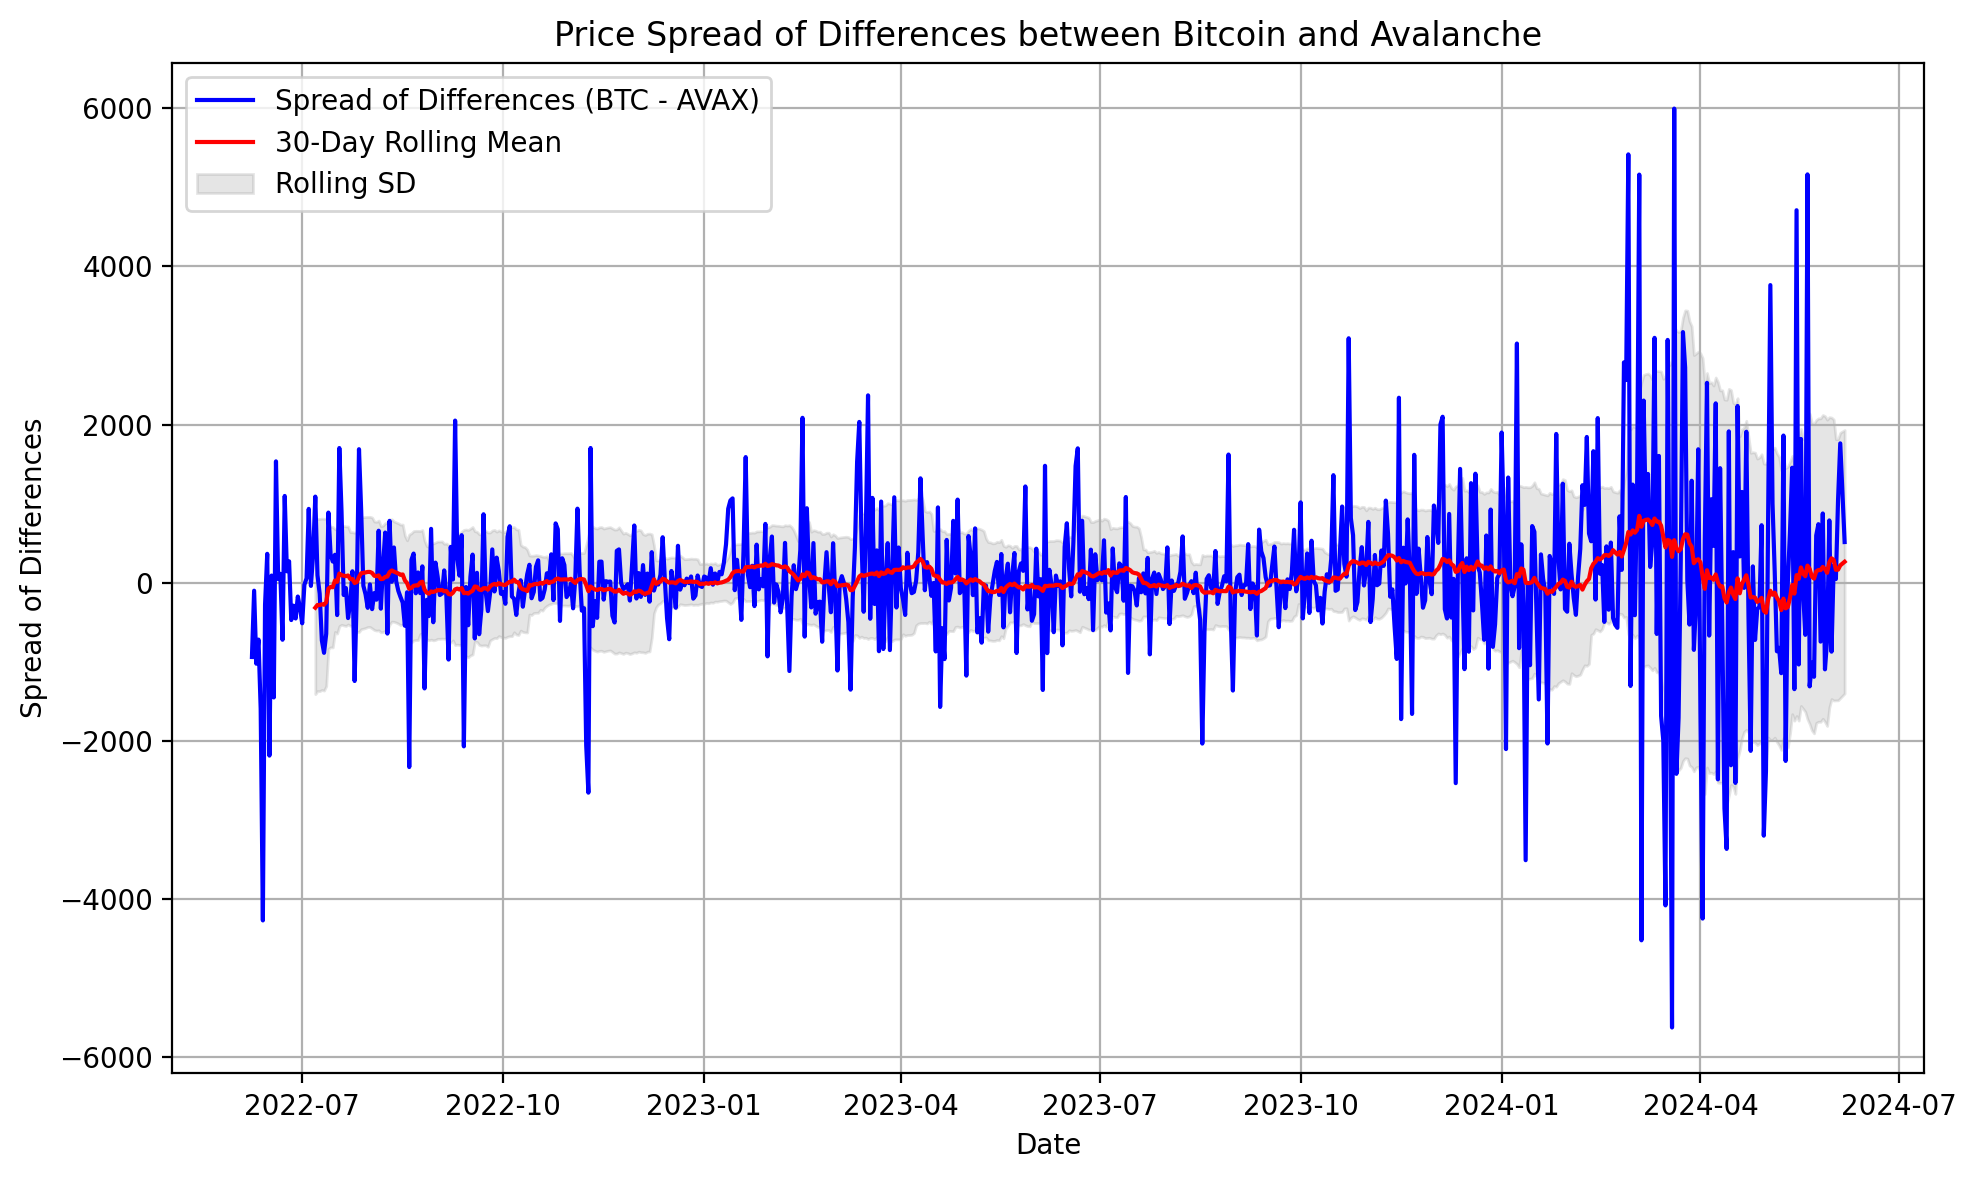

In [23]:
# Plotting the rolling mean and SD for the spread of differences between BTC and AVAX
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(stock_df.index, stock_df['Spread_diff'], label='Spread of Differences (BTC - AVAX)', color='blue')
plt.plot(stock_df.index, rolling_mean_spread_diff, label='30-Day Rolling Mean', color='red')
plt.fill_between(stock_df.index, rolling_mean_spread_diff - rolling_sd_spread_diff, rolling_mean_spread_diff + rolling_sd_spread_diff, color='gray', alpha=0.2, label='Rolling SD')
plt.xlabel('Date')
plt.ylabel('Spread of Differences')
plt.title('Price Spread of Differences between Bitcoin and Avalanche')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Calculate Z-score of the spread difference
stock_df['Z_Score_diff'] = (stock_df['Spread_diff'] - stock_df['Spread_diff'].rolling(window=30).mean()) / stock_df['Spread_diff'].rolling(window=30).std()

# Define thresholds for potential buy and sell signals
buy_threshold = -2  # Buy signal when Z-score is below this threshold
sell_threshold = 2  # Sell signal when Z-score is above this threshold

# Identify potential mean reversion signals
potential_buy_signals = stock_df[stock_df['Z_Score_diff'] < buy_threshold]
potential_sell_signals = stock_df[stock_df['Z_Score_diff'] > sell_threshold]

# Print potential buy and sell signals
print("Potential Buy Signals:")
print(potential_buy_signals)
print("\nPotential Sell Signals:")
print(potential_sell_signals)


Potential Buy Signals:
                     BTC       AVAX        Spread       Ratio1    Ratio2  \
Date                                                                       
2022-08-19  20877.552734  22.487879  20855.064856   928.391376  0.001077   
2022-08-26  20260.019531  20.598030  20239.421501   983.590151  0.001017   
2022-09-13  20296.707031  19.068272  20277.638760  1064.423007  0.000939   
2022-11-08  18541.271484  15.991605  18525.279880  1159.437824  0.000862   
2022-11-09  15880.780273  12.917875  15867.862398  1229.364730  0.000813   
2022-12-16  16647.484375  11.846814  16635.637561  1405.228795  0.000712   
2023-01-30  22840.138672  19.739170  22820.399502  1157.097213  0.000864   
2023-02-09  21819.039062  17.874453  21801.164610  1220.682924  0.000819   
2023-04-19  28822.679688  18.993925  28803.685762  1517.468324  0.000659   
2023-06-05  25760.097656  13.897244  25746.200412  1853.611897  0.000539   
2023-07-14  30334.068359  14.644426  30319.423933  2071.372933  0

Z-Score Calculation: Calculates the Z-score of the spread using the formula:

Z_Score =   Spread − 30 day Rolling Mean of Spread
                                                / 30 day Rolling Standard Deviation of Spread


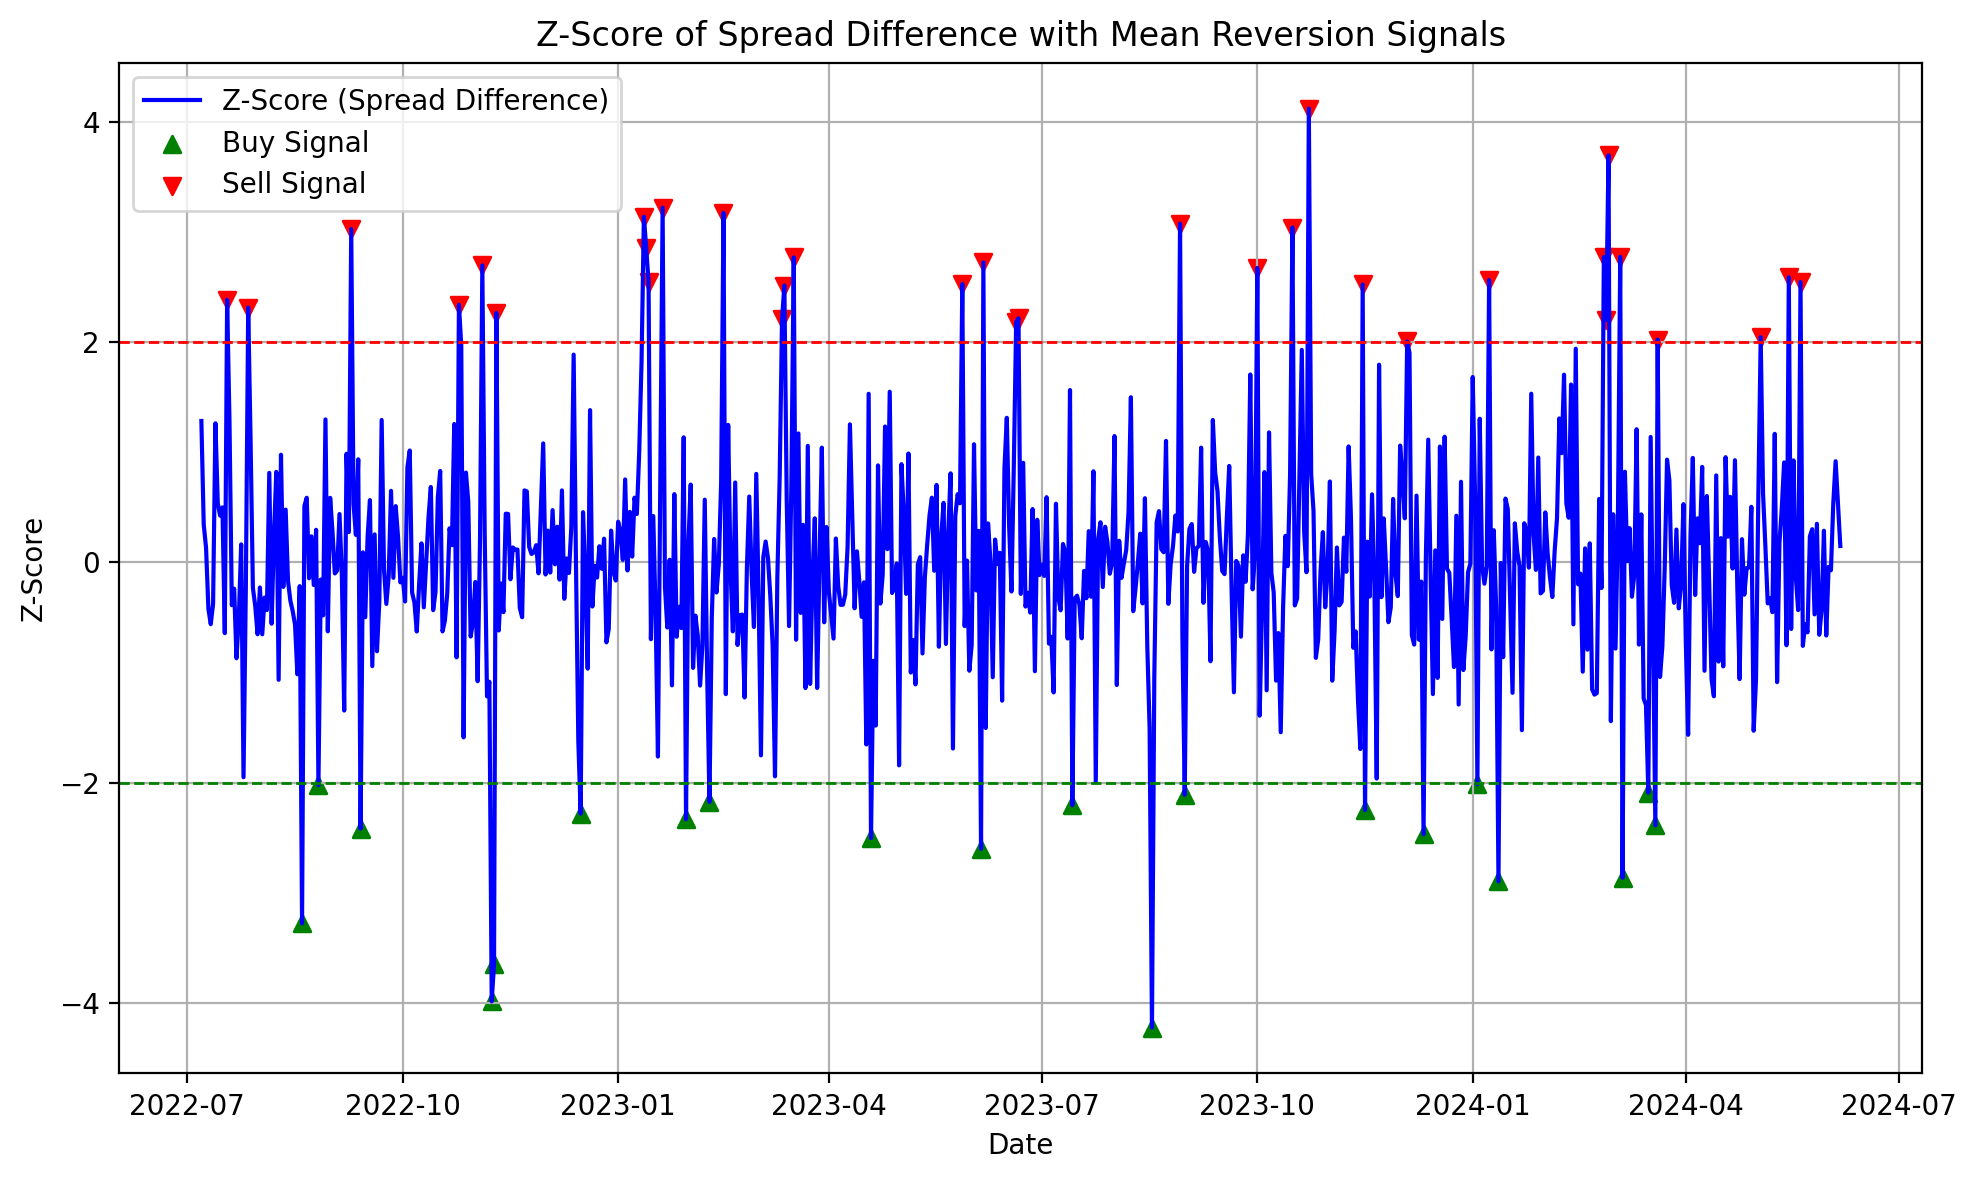

In [25]:
# Plotting
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(stock_df.index, stock_df['Z_Score_diff'], label='Z-Score (Spread Difference)', color='blue')
plt.scatter(potential_buy_signals.index, potential_buy_signals['Z_Score_diff'], color='green', marker='^', label='Buy Signal')
plt.scatter(potential_sell_signals.index, potential_sell_signals['Z_Score_diff'], color='red', marker='v', label='Sell Signal')
plt.axhline(buy_threshold, color='green', linestyle='--', linewidth=1)
plt.axhline(sell_threshold, color='red', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.title('Z-Score of Spread Difference with Mean Reversion Signals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


When the Z-score is low, it indicates that the current spread is below its historical average, suggesting that it may be undervalued. Conversely, when the Z-score is high, it indicates that the current spread is above its historical average, suggesting that it may be overvalued.

However it's essential to thoroughly backtest and validate any trading strategy before implementing it in a live trading environment. Additionally, the effectiveness of such strategies may vary depending on the market conditions and the specific assets being traded.

# Trading strategies

The dataframe containing historical data is already clean. And speadis also calculated.

Entry Rules:

Enter a long position (buy) if the Z-score of the spread falls below the buy threshold (-2). 
This indicates that the spread is significantly below its historical mean, suggesting a potential undervaluation.
Enter a short position (sell) if the Z-score of the spread exceeds the sell threshold (2). 
This indicates that the spread is significantly above its historical mean, suggesting a potential overvaluation.

Exit Rules:

Exit the long position when the Z-score reverts to zero or close to zero, indicating that the spread has returned to its historical mean.
This signifies a potential reversal in the undervaluation.
Exit the short position when the Z-score reverts to zero or close to zero, indicating that the spread has returned to its historical mean. 
This signifies a potential reversal in the overvaluation.

Trading Strategy Implementation:

Monitor the Z-score of the spread continuously.
When the Z-score crosses the buy threshold (-2), initiate a long position.
When the Z-score crosses the sell threshold (2), initiate a short position.
Exit the respective positions when the Z-score reverts to zero or close to zero, indicating a potential mean reversion.

# # Pairs trading 

Enter long position at spread: -1025.8587703704834
Exit long position at spread: 364.37523078918457
Enter long position at spread: -2188.7097330093384
Exit long position at spread: 89.55486011505127
Enter long position at spread: -1452.6714935302734
Exit long position at spread: 1534.2802658081055
Enter long position at spread: -1244.5724449157715
Exit long position at spread: 1688.0450248718262
Enter long position at spread: -2333.4157276153564
Exit long position at spread: 288.6928119659424
Enter long position at spread: -1338.4624786376953
Exit long position at spread: 680.2610549926758
Enter long position at spread: -2071.4622497558594
Exit long position at spread: 71.5025405883789
Enter long position at spread: -2059.4681062698364
Exit long position at spread: 1703.5225801467896
Enter long position at spread: -1118.1523532867432
Exit long position at spread: 219.46085166931152
Enter long position at spread: -1111.9944610595703
Exit long position at spread: 82.12252998352051
Enter 

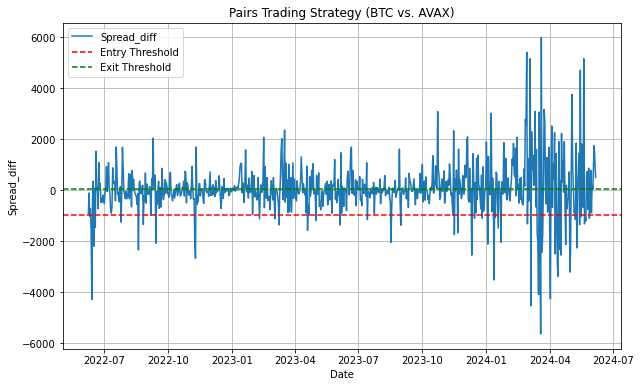

In [26]:
# Define mean and standard deviation of the spread
spread_mean = np.mean(stock_df['Spread_diff'])
spread_std = np.std(stock_df['Spread_diff'])

# Entry and exit thresholds (e.g., mean ± 1 standard deviation)
entry_threshold = spread_mean - spread_std
exit_threshold = spread_mean

# Initialize position
position = 0

# Iterate through historical data
for i in range(1, len(stock_df)):
    spread = stock_df['Spread_diff'].iloc[i]

    # Entry condition: spread crosses below entry threshold
    if spread < entry_threshold and position == 0:
        position = 1  # Enter long position
        entry_price = spread
        print(f"Enter long position at spread: {entry_price}")

    # Exit condition: spread crosses above exit threshold
    elif spread > exit_threshold and position == 1:
        position = 0  # Exit long position
        exit_price = spread
        print(f"Exit long position at spread: {exit_price}")

# Plot the spread and thresholds
plt.figure(figsize=(10, 6))
plt.plot(stock_df.index, stock_df['Spread_diff'], label='Spread_diff')
plt.axhline(y=entry_threshold, color='r', linestyle='--', label='Entry Threshold')
plt.axhline(y=exit_threshold, color='g', linestyle='--', label='Exit Threshold')
plt.xlabel('Date')
plt.ylabel('Spread_diff')
plt.title('Pairs Trading Strategy (BTC vs. AVAX)')
plt.legend()
plt.grid(True)
plt.show()

## Machine learning algorithms

I suggest machine learning algorithms for this mean reversion strategy. Beacuse it is more safe and we can continuously monitor the performance of your classification model and trading strategy. Iterate on feature selection, model training, and hyperparameter tuning to improve the accuracy and robustness of your predictions.

In [27]:
stock_df.tail(2)

,BTC,AVAX,Spread,Ratio1,Ratio2,BTC_diff,AVAX_diff,BTC_log,AVAX_log,Spread_diff,Z_Score_diff
Date,,,,,,,,,,,
2024-06-04,70567.765625,36.073288,70531.692337,1956.233258,0.000511,1762.984375,1.032822,11.164329,3.585553,1761.951553,0.919901
2024-06-06,71081.570312,36.342316,71045.227997,1955.889959,0.000511,513.804688,0.269028,11.171583,3.592983,513.535660,0.149725


In [28]:
# Drop unwanted columns
columns_to_keep = ['BTC', 'AVAX','Spread']
df = stock_df[columns_to_keep]

In [29]:
# Calculate spread between BTC and AVAX
df['Spread'] = df['BTC'] - df['AVAX']

# Calculate Z-Score of the spread
mean_spread = df['Spread'].mean()
std_spread = df['Spread'].std()
df.loc[:, 'Z_Score'] = (df['Spread'] - mean_spread) / std_spread

# Calculate Short Moving Average (Short_MA) and Long Moving Average (Long_MA)
short_window = 20
long_window = 50
df.loc[:, 'Short_MA'] = df['Spread'].rolling(window=short_window, min_periods=1).mean()
df.loc[:, 'Long_MA'] = df['Spread'].rolling(window=long_window, min_periods=1).mean()

# Initialize Position_MA column
df['Position_MA'] = None

# Generate signals for Position_MA
df.loc[:, 'Position_MA'] = 0
df.loc[df['Short_MA'] > df['Long_MA'], 'Position_MA'] = 1  # Buy signal
df.loc[df['Short_MA'] < df['Long_MA'], 'Position_MA'] = -1  # Sell signal

df.loc[:, 'Price_Ratio'] = df['BTC'] / df['AVAX']
df.loc[:, 'Inverse_Price_Ratio'] = df['AVAX'] / df['BTC']
df.loc[:, 'Log_Price_Ratio'] = np.log(df['BTC'] / df['AVAX'])
df.loc[:, 'Inverse_Log_Price_Ratio'] = np.log(df['AVAX'] / df['BTC'])


C:\Users\sthis\AppData\Local\Temp\ipykernel_20028\4008898731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Spread'] = df['BTC'] - df['AVAX']
C:\Users\sthis\AppData\Local\Temp\ipykernel_20028\4008898731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Z_Score'] = (df['Spread'] - mean_spread) / std_spread
C:\Users\sthis\AppData\Local\Temp\ipykernel_20028\4008898731.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [30]:
# Define target variable based on mean reversion signals
df['Target'] = np.where(df['Position_MA'] == 1, 1, np.where(df['Position_MA'] == -1, -1, 0))

# Display the updated DataFrame
print(df)

                     BTC       AVAX        Spread   Z_Score      Short_MA  \
Date                                                                        
2022-06-07  31155.478516  24.635429  31130.843086 -0.103939  31130.843086   
2022-06-08  30214.355469  24.500254  30189.855215 -0.164355  30660.349151   
2022-06-09  30111.998047  24.410660  30087.587387 -0.170922  30469.428563   
2022-06-10  29083.804688  22.076071  29061.728617 -0.236787  30117.503576   
2022-06-11  28360.810547  19.798967  28341.011580 -0.283061  29762.205177   
...                  ...        ...           ...       ...           ...   
2024-06-01  67706.937500  35.760113  67671.177387  2.242138  67463.444166   
2024-06-02  67751.601562  34.932491  67716.669071  2.245059  67705.826244   
2024-06-03  68804.781250  35.040466  68769.740784  2.312672  68068.252256   
2024-06-04  70567.765625  36.073288  70531.692337  2.425798  68283.196244   
2024-06-06  71081.570312  36.342316  71045.227997  2.458769  68575.601619   

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your DataFrame is named df

# Step 1: Split your data into training and testing datasets
X = df[['Spread', 'Z_Score', 'Short_MA', 'Long_MA', 'Price_Ratio', 'Inverse_Price_Ratio', 'Log_Price_Ratio', 'Inverse_Log_Price_Ratio']]
y = df['Target']

# Ensure balanced representation of both classes in training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Choose a classification algorithm (Decision Tree)
clf = DecisionTreeClassifier(random_state=42)

# Step 3: Train the classification model
clf.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9726027397260274
Precision: 0.9839357429718875
Recall: 0.978835978835979
F1-score: 0.9808405855764689


Let's do some parameter training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your DataFrame is named df

# Step 1: Split your data into training and testing datasets
X = df[['Spread', 'Z_Score', 'Short_MA', 'Long_MA', 'Price_Ratio', 'Inverse_Price_Ratio', 'Log_Price_Ratio', 'Inverse_Log_Price_Ratio']]
y = df['Target']

# Ensure balanced representation of both classes in training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Step 2: Choose a classification algorithm (Decision Tree)
clf = DecisionTreeClassifier(random_state=42)

# Step 3: Train the classification model
clf.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9383561643835616
Precision: 0.8876490611122382
Recall: 0.9171103743888555
F1-score: 0.9014035999257747


Overall Model Performance: Based on the model performance we can support the mean reversion algorithms and support trading.